In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images,titles,h,w,n_row=3,n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom=0,left=0.01,right=0.99,top=0.90,hspace=0.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i].reshape(h, w), cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())

In [2]:
dir_name = "E:\\dataset\\faces"
y = []  # List to store target labels
x = []  # List to store data
target_names = []  # List to store target names
person_id = 0
h = w = 300
n_samples = 0
class_names = []
print("Directory path:", dir_name)

for person_name in os.listdir(dir_name):
    dir_path = dir_name + "\\"+ person_name+ "\\"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = dir_path + image_name
        # Read the input image 
        img = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize image to 300x300 dimension
        resized_image = cv2.resize(gray, (h, w))
        # Convert matrix to vector 
        v = resized_image.flatten()
        x.append(v)
        # Increase the number of samples 
        n_samples = n_samples + 1
        # Adding the categorical label
        y.append(person_id)
        # Adding the person name
        target_names.append(person_name)
    # Increase the person id by 1
    person_id = person_id + 1

# Transform lists to numpy arrays
y = np.array(y)
x = np.array(x)
target_names = np.array(target_names)
n_features = x.shape[1]
print(y.shape, x.shape)
print("Number of samples:", n_samples)

Directory path: E:\dataset\faces
(450,) (450, 90000)
Number of samples: 450


In [3]:
print(x)

[[249 246 244 ...  22  22  23]
 [ 61  61  61 ... 233 233 232]
 [155  52  30 ...  11  44  22]
 ...
 [142 142 142 ...  61  57  56]
 [ 56  71  70 ...   9   8  15]
 [125 115 108 ...  67  71  72]]


Extracting the top 150 faces


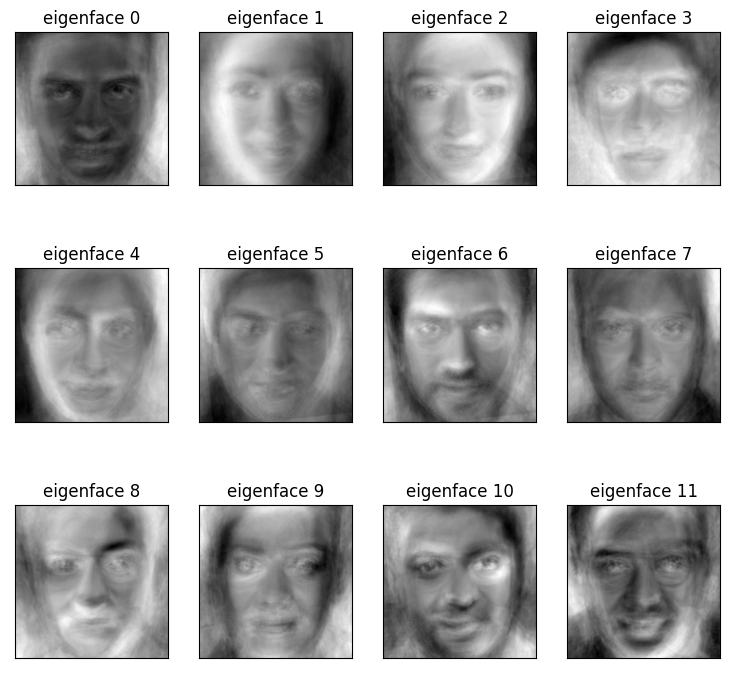

projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
project done...


In [4]:
#split into a training and testing set
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.25,random_state=42)


#compute a PCA (eigenfaces)on the face dataset (treated as unlabelled dataset)
n_components=150

print("Extracting the top %d faces"%(n_components))

#applying PCA
pca=PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(x_train)

#Generating eigenfaces
eigenfaces=pca.components_.reshape((n_components,h,w))

# plot the gallery of the most significative eigenfaces
eigenface_titles=["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenface_titles,h,w)

plt.show()

print("projecting the input data on the eigenfaces orthonormal basis")
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

#%% compute fisher faces
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_pca,y_train)
x_train_lda=lda.transform(x_train_pca)
x_test_lda=lda.transform(x_test_pca)
print("project done...")


In [5]:
#Training with Multi layer perceptron
clf=MLPClassifier(random_state=1,hidden_layer_sizes=(10,10),max_iter=1000,verbose=True).fit(x_train_lda,y_train)
print("Model Weights:")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.98879278
Iteration 2, loss = 2.92808664
Iteration 3, loss = 2.87226185
Iteration 4, loss = 2.81694189
Iteration 5, loss = 2.76234100
Iteration 6, loss = 2.71171370
Iteration 7, loss = 2.66122540
Iteration 8, loss = 2.61397773
Iteration 9, loss = 2.56949377
Iteration 10, loss = 2.52588515
Iteration 11, loss = 2.48340868
Iteration 12, loss = 2.44484914
Iteration 13, loss = 2.40640315
Iteration 14, loss = 2.37076284
Iteration 15, loss = 2.33449089
Iteration 16, loss = 2.30048813
Iteration 17, loss = 2.26831632
Iteration 18, loss = 2.23536427
Iteration 19, loss = 2.20611113
Iteration 20, loss = 2.17464068
Iteration 21, loss = 2.14572479
Iteration 22, loss = 2.11587349
Iteration 23, loss = 2.08660446
Iteration 24, loss = 2.05794844
Iteration 25, loss = 2.02983265
Iteration 26, loss = 2.00252302
Iteration 27, loss = 1.97406259
Iteration 28, loss = 1.94612307
Iteration 29, loss = 1.91826357
Iteration 30, loss = 1.89033673
Iteration 31, loss = 1.86343741
Iteration 32, los

Iteration 260, loss = 0.13579603
Iteration 261, loss = 0.13475753
Iteration 262, loss = 0.13370416
Iteration 263, loss = 0.13272282
Iteration 264, loss = 0.13175929
Iteration 265, loss = 0.13078317
Iteration 266, loss = 0.12983198
Iteration 267, loss = 0.12889646
Iteration 268, loss = 0.12794199
Iteration 269, loss = 0.12710486
Iteration 270, loss = 0.12615465
Iteration 271, loss = 0.12524756
Iteration 272, loss = 0.12434101
Iteration 273, loss = 0.12343762
Iteration 274, loss = 0.12255653
Iteration 275, loss = 0.12165746
Iteration 276, loss = 0.12078574
Iteration 277, loss = 0.11990090
Iteration 278, loss = 0.11900792
Iteration 279, loss = 0.11815210
Iteration 280, loss = 0.11726810
Iteration 281, loss = 0.11642280
Iteration 282, loss = 0.11563374
Iteration 283, loss = 0.11474168
Iteration 284, loss = 0.11396408
Iteration 285, loss = 0.11314625
Iteration 286, loss = 0.11232880
Iteration 287, loss = 0.11153887
Iteration 288, loss = 0.11074618
Iteration 289, loss = 0.10999188
Iteration 

Iteration 544, loss = 0.03592114
Iteration 545, loss = 0.03580241
Iteration 546, loss = 0.03569708
Iteration 547, loss = 0.03558875
Iteration 548, loss = 0.03548560
Iteration 549, loss = 0.03538476
Iteration 550, loss = 0.03527830
Iteration 551, loss = 0.03517343
Iteration 552, loss = 0.03507515
Iteration 553, loss = 0.03497035
Iteration 554, loss = 0.03487463
Iteration 555, loss = 0.03478151
Iteration 556, loss = 0.03467195
Iteration 557, loss = 0.03457381
Iteration 558, loss = 0.03448112
Iteration 559, loss = 0.03437778
Iteration 560, loss = 0.03428789
Iteration 561, loss = 0.03419409
Iteration 562, loss = 0.03409068
Iteration 563, loss = 0.03403856
Iteration 564, loss = 0.03391017
Iteration 565, loss = 0.03381981
Iteration 566, loss = 0.03371632
Iteration 567, loss = 0.03364655
Iteration 568, loss = 0.03352558
Iteration 569, loss = 0.03344356
Iteration 570, loss = 0.03334058
Iteration 571, loss = 0.03324316
Iteration 572, loss = 0.03314855
Iteration 573, loss = 0.03306081
Iteration 

Accuracy: 69.02654867256638


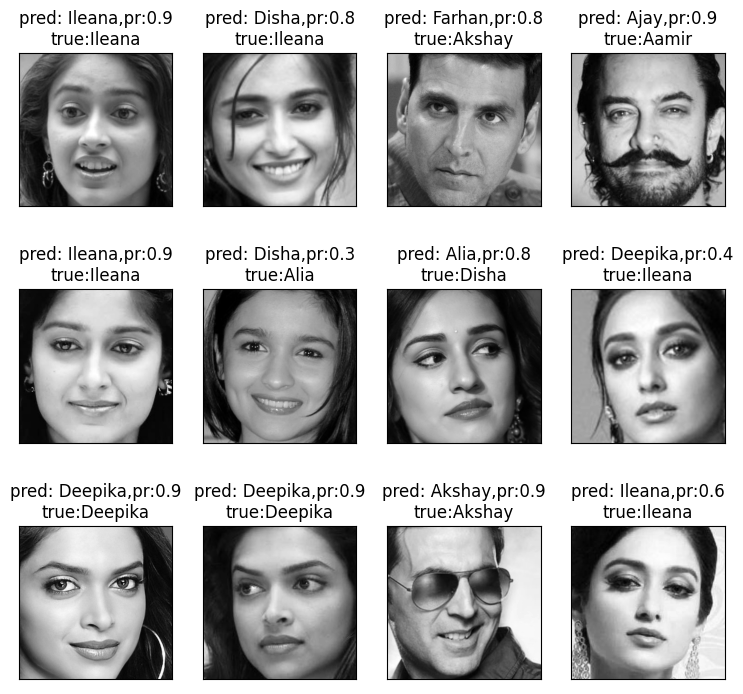

In [6]:
y_pred=[];y_prob=[]
for test_face in x_test_lda:
    prob=clf.predict_proba([test_face])[0]
    #print(prob,np.max(prob))
    class_id=np.where(prob==np.max(prob))[0][0]
    #print(class_index)
    #Find the label of the mathed face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
    
#Transform the data
y_pred=np.array(y_pred)

prediction_titles=[]
true_positive=0
for i in range(y_pred.shape[0]):
    #print(y_test[i],y_pred[i])
    #true_name=target_names[y_test[i]].rsplit('',1)[-1]
    #pred_name=target_names[y_pred[i]].rsplit('',1)[-1]
    true_name=class_names[y_test[i]]
    pred_name=class_names[y_pred[i]]
    result='pred: %s,pr:%s\ntrue:%s'%(pred_name,str(y_prob[i])[0:3],true_name)
    #result='prediction:%s \ntrue:  %s'%(pred_name,true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1

print("Accuracy:",true_positive*100/y_pred.shape[0])

## plot results
plot_gallery(x_test,prediction_titles,h,w)
plt.show()